In [4]:
# Import necessary libraries
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, recall_score
warnings.filterwarnings('ignore')  # Ignore all warnings
%matplotlib inline


In [5]:

# Load dataset
header_path = '/content/drive/Othercomputers/My laptop/DATA SCIENCE and AI/email phising Msc/spam_base_cols.names'
rows_path = '/content/drive/Othercomputers/My laptop/DATA SCIENCE and AI/email phising Msc/spambase.data'


In [6]:

# Import data features
features = []

with open(header_path, "r") as doc:
    lines = doc.readlines()
    for line in lines:
        if ":" in line:  # Ignore lines without colon
            feature_name = line.split(":")[0].strip()  # Extract feature name
            features.append(feature_name)
print(features)


['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [7]:

# Import data rows
df = pd.read_csv(rows_path, names=features)

# Check for missing data
print("Missing data:", df.isna().any().any())

# Basic statistics on dataset
print(df.describe())


Missing data: False
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min       

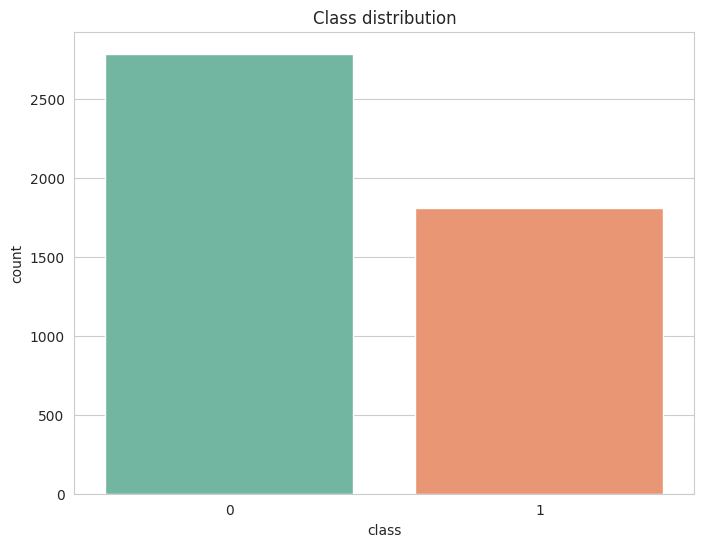

Percentage of class Non-spam : 60.59552271245382
Percentage of class Spam: 39.404477287546186


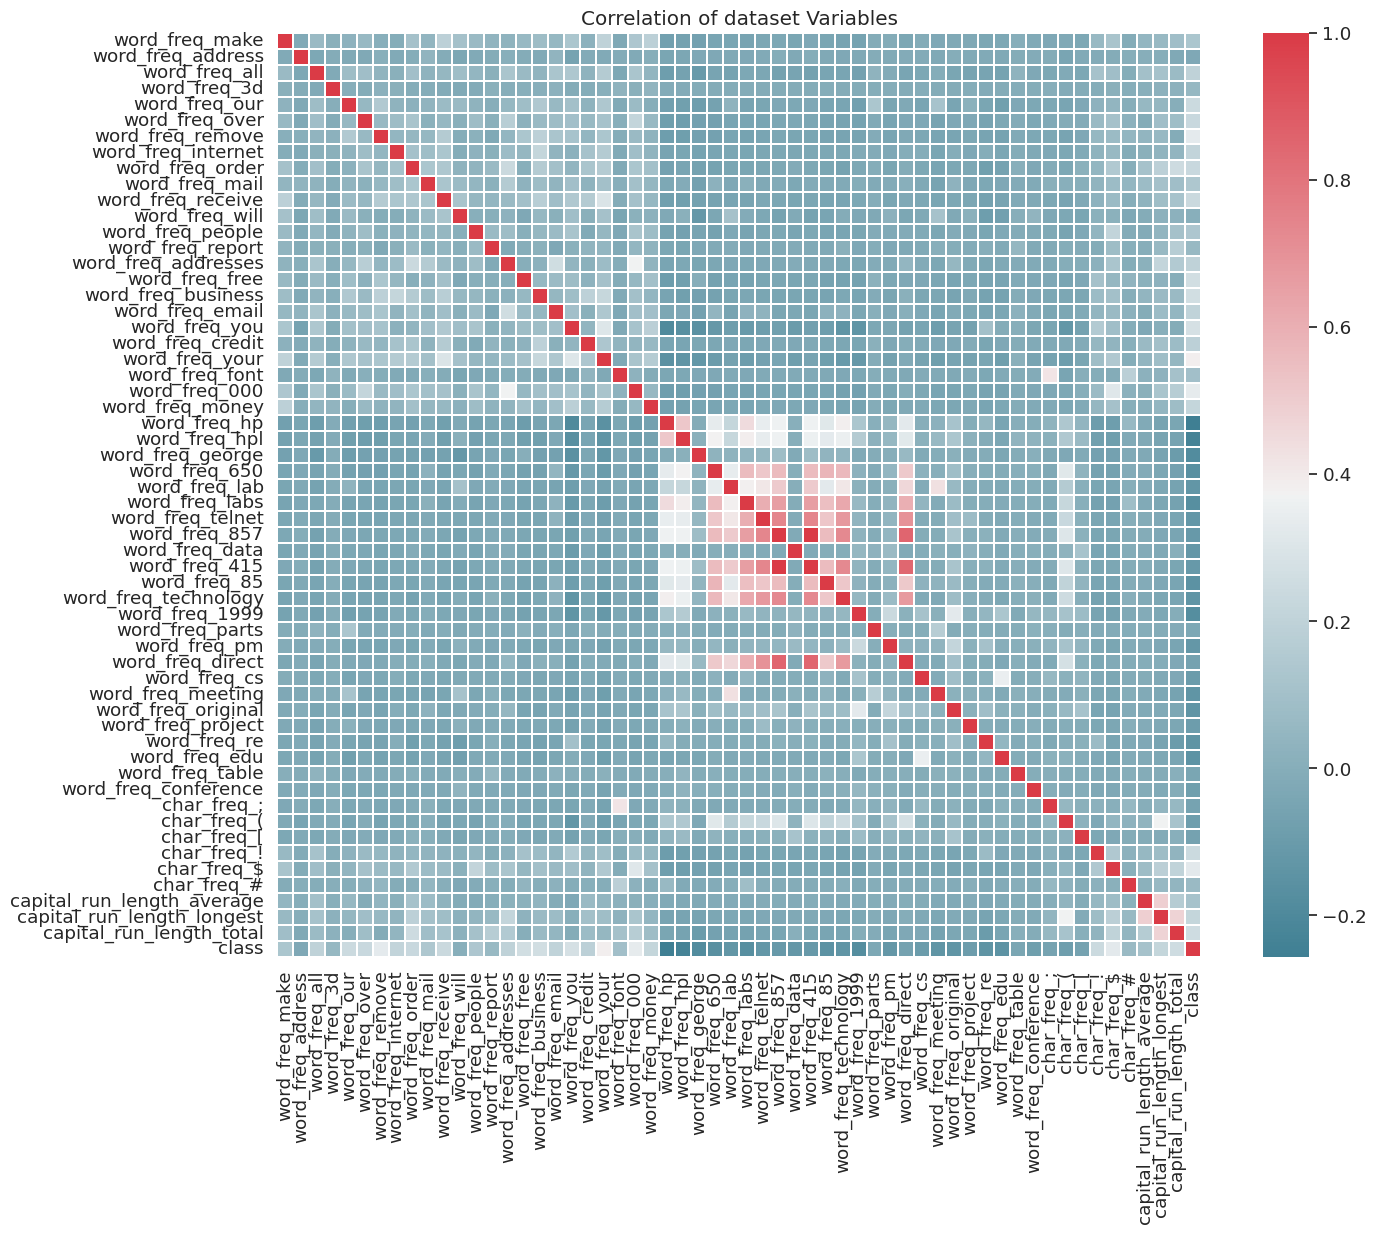

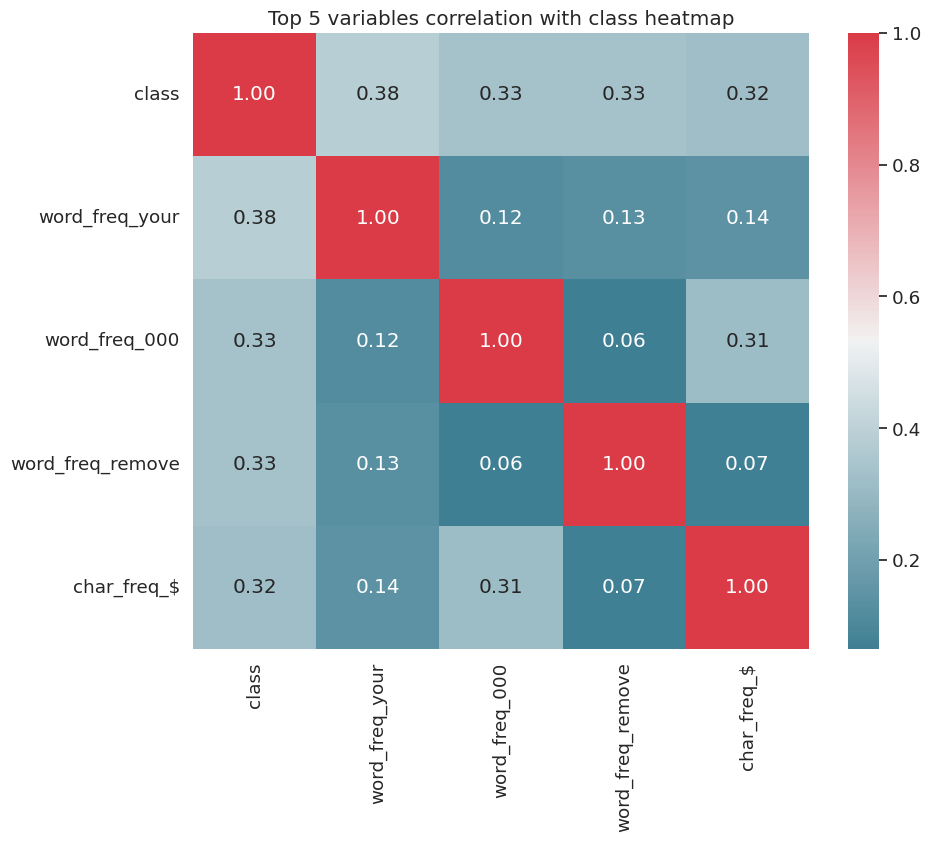

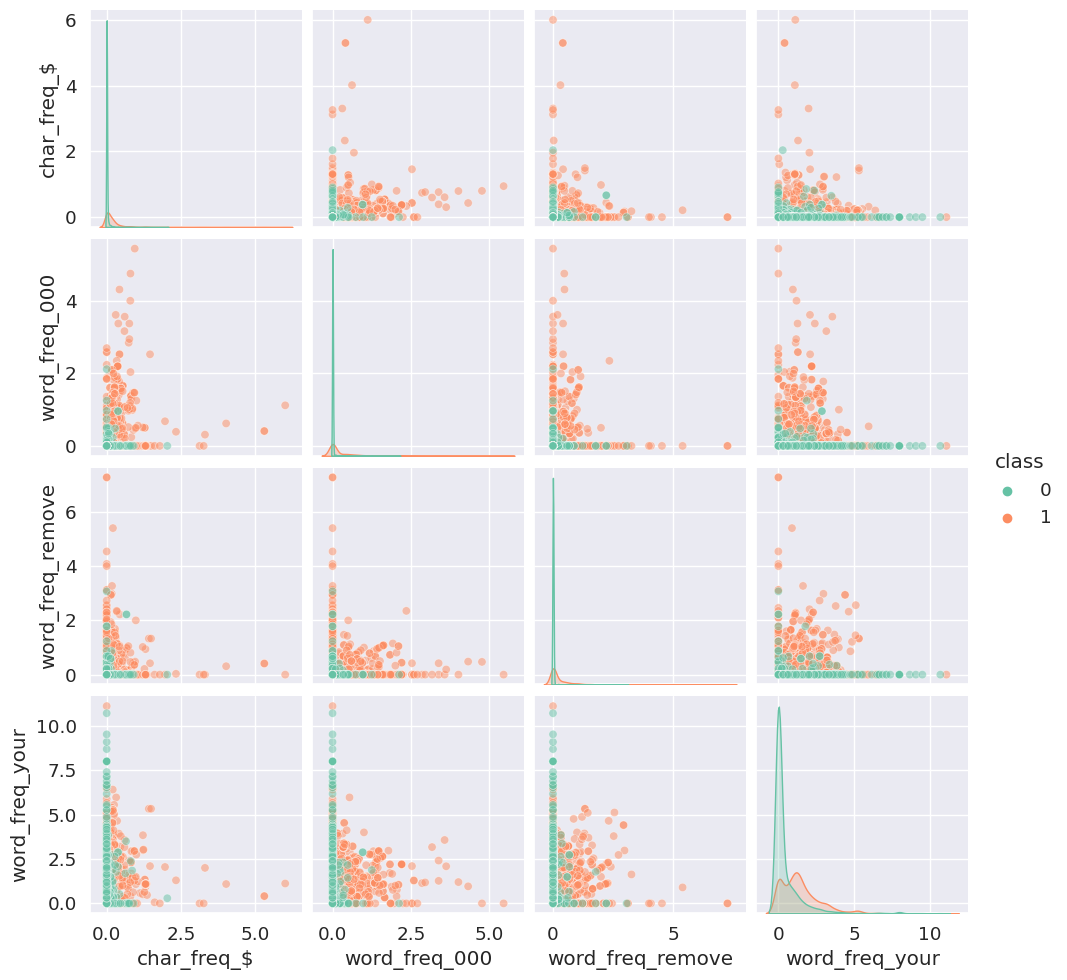

In [8]:

# Visual distribution of spam to non-spam ratio
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.title("Class distribution")
sns.set(font_scale=1.2)
sns.set_palette("Set2")
sns.countplot(x=df.columns[-1], data=df)
plt.show()

# Calculate class percentages
class_counts = df.iloc[:, -1].value_counts(normalize=True) * 100
print("Percentage of class Non-spam :", class_counts[0])
print("Percentage of class Spam:", class_counts[1])

# Correlation analysis to understand the strength of the relationship of the variables
corr = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, 
            linewidths=.1, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns)
plt.title("Correlation of dataset Variables")

# Get the top k variables with the highest absolute correlation with 'class'
k = 5
corr_abs = df.corr().abs()
top_vars = corr_abs.nlargest(k, 'class')['class'].index

# Plot the heatmap of the correlation matrix for the top k variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_abs.loc[top_vars, top_vars],
            annot=True,
            fmt='.2f',
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)
plt.title(f'Top {k} variables correlation with class heatmap')
plt.show()

# Create a pair plot for the top 5 variables, colored by the target class
sns.pairplot(data=df[top_vars.union(['class'])], hue="class", plot_kws={"alpha": 0.5})

# Split the dataset into training and testing sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:

# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)


In [10]:

# Train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)
svm_classifier.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Obtain predicted probabilities for the test set
y_prob = svm_classifier.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate area under ROC curve
roc_auc = auc(fpr, tpr)


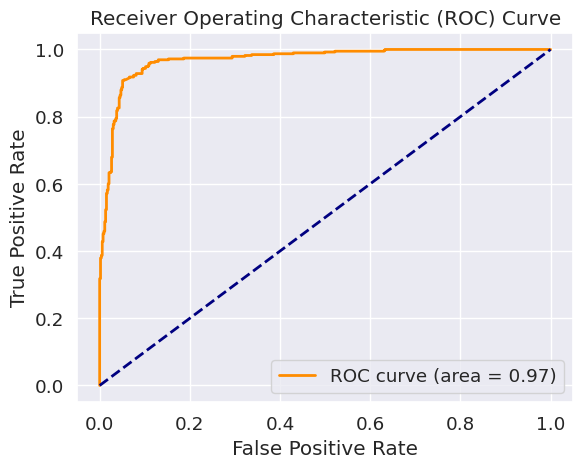

In [11]:

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [12]:

# Calculate recall
recall = recall_score(y_test, y_pred)

# Evaluate the classifier's performance
print("Classification report:\n", classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Recall score:", recall)


Classification report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       531
           1       0.92      0.91      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921

Accuracy score: 0.9283387622149837
Recall score: 0.9102564102564102


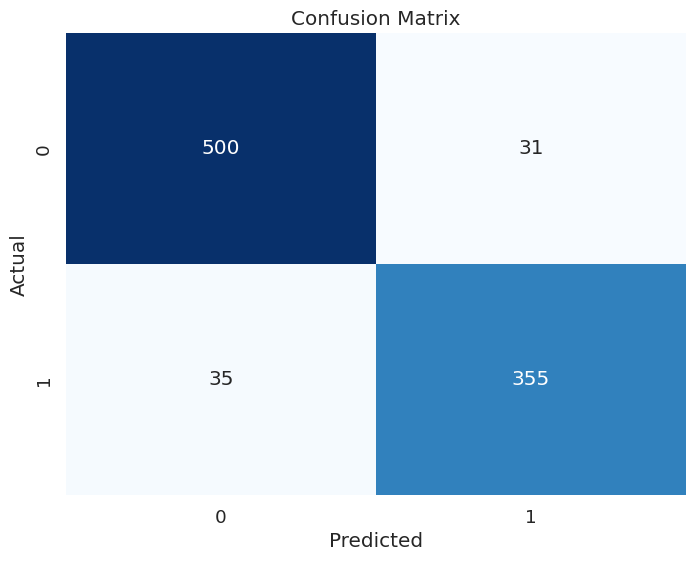

In [13]:

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

